# EVTF files and eclypse

Author: dd3f

here we try to extract info from the EVTF file

In [1]:
import os
import glob
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import matplotlib

#matplotlib.style.use('classic')
print(plt.style.available)

['seaborn-talk', 'seaborn-poster', 'classic', 'dark_background', 'seaborn-deep', 'seaborn-darkgrid', 'seaborn-notebook', 'seaborn-dark-palette', 'seaborn-muted', 'ggplot', 'fivethirtyeight', 'grayscale', 'seaborn-white', 'bmh', 'seaborn-whitegrid', 'seaborn-pastel', 'seaborn-dark', 'seaborn-paper', 'seaborn-ticks', 'seaborn-bright', 'seaborn-colorblind']


In [2]:
#dir data
dir_raw_data = '../raw_data/mars-express-power-3years/'
dir_data = '../data/'


evtf_files = glob.glob(dir_raw_data + '/train_set/*evtf.csv')
evtf_files2 = glob.glob(dir_raw_data + '/test_set/*evtf.csv')
evtf_list = []
for fl in (evtf_files + evtf_files2):
    evtf_list.append(pd.read_csv(fl))
df_evtf = pd.concat(evtf_list)
df_evtf['ut_ms'] = pd.to_datetime(df_evtf['ut_ms'], unit='ms')

Differently from what done in "Preliminar exploration" file, here I don't set the index 

In [3]:
df_evtf.head()

,ut_ms,description
0,2012-05-27 00:23:15,MRB_AOS_10
1,2012-05-27 00:29:53,MAD_LOS_10_/_RTLT_01146
2,2012-05-27 00:30:21,CEB_LOS_10_/_RTLT_01146
3,2012-05-27 00:38:56,MAD_LOS_08_/_RTLT_01146
4,2012-05-27 00:56:11,MAD_LOS_05_/_RTLT_01146


I want to split all the commands as single events. I found a script [here](http://stackoverflow.com/a/12681217/1413825) that I don't know what it does.

In [ ]:
df_new_evtf = pd.concat([pd.Series(row['ut_ms'], row['description'].split('/'))              
                    for _, row in df_evtf.iterrows()]).reset_index()

In [ ]:

df_new_evtf.head()

In [ ]:
#df_evtf['test'] = df_evtf.description.str.split('/')

In [ ]:
print(df_evtf.columns)
df_new_evtf.rename(columns = {'index':'description',0:'ut_ms'},inplace=True)
df_new_evtf.sort_values(by='ut_ms',inplace=True)
del df_evtf
df_new_evtf.head()

It took a huge time, so it is better to save it!

In [8]:
filename= "evtf_singleCommand.p"
#df_new_evtf.to_pickle(dir_data + filename )
df_new_evtf = pd.read_pickle(dir_data + filename)
df_new_evtf.sort_values(by='ut_ms',inplace=True)

In [9]:
df_new_evtf.shape

(594424, 2)

In [10]:
df_evtf.shape

(329123, 2)

In [11]:
all_events = df_new_evtf['description'].value_counts()

In [12]:
type(all_events)

pandas.core.series.Series

In [13]:
all_events.head(30)

MRB_                     17650
_RANGE_06000KM_END       13018
_RANGE_06000KM_START     13017
800_KM_ASCEND             9464
1200_KM_DESCEND           9464
2000_KM_ASCEND            9464
800_KM_DESCEND            9464
1200_KM_ASCEND            9464
4000_KM_ASCEND            9464
4000_KM_DESCEND           9464
2000_KM_DESCEND           9464
MSL_                      8385
MRB_AOS_00                6505
MRB_LOS_00                6504
OCC_MARS_200KM_START_     5892
OCC_MARS_200KM_END_       5892
MRB_LOS_10                5292
MRB_AOS_10                5292
OCC_MARS_START_           5221
OCC_MARS_END_             5221
MAR_PENUMBRA_END          5025
MAR_PENUMBRA_START        5025
MAR_UMBRA_END             4982
MAR_UMBRA_START           4982
NNO_LOS_05_               3764
CEB_LOS_05_               3215
CAN_AOS_10_               3038
GDS_LOS_10_               2752
GDS_LOS_06_               2752
KLZ_AOS_00_               2752
Name: description, dtype: int64

In [45]:
#tmp = all_events.groupby(all_events.values)

In [42]:
#all_events.duplicated()

There are single events:

In [16]:
(all_events ==1 ).sum()

52400

In [17]:
all_events[all_events == 1 ].head(12)

_OMP_(301.04,-40.99)_        1
_SSP_(300.09,014.79)_        1
_OMP_(173.13,-35.84)_        1
APOCENTRE_PASSAGE_08711      1
APOCENTRE_PASSAGE_13529      1
_OMP_(232.01,070.03)_        1
_OMP_(237.06,-69.40)_        1
_OMP_(039.00,-43.98)_        1
_OMP_(053.40,-12.82)_        1
_OMP_(196.65,057.77)_        1
PERICENTRE_PASSAGE_06023_    1
APOCENTRE_PASSAGE_12767      1
Name: description, dtype: int64

# OMP and SSP
there are these object that seems to carry further information. I try to extract it!

The shape seems to be `_XXX_(f,f)_` where f and f are the parameters of interest 
an attempt for a regular expression partially inspired by [http://www.regular-expressions.info/floatingpoint.html]

In [18]:
re_tmpt = "\_(.*)\_\(([-+]?[0-9]*\.?[0-9]+)\,([-+]?[0-9]*\.?[0-9]+)\)\_"

In [19]:
ContInfs = df_new_evtf.description.str.match(re_tmpt,as_indexer=True)

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [20]:
split_val = df_new_evtf[ContInfs].description.str.extract(re_tmpt,expand=True)
split_val.head()

,0,1,2
160102,OMP,296.35,-46.48
160107,OMP,299.32,-43.44
160121,SSP,016.12,030.74
160126,OMP,355.36,050.22
160131,OMP,001.91,054.49


In [21]:
tmp_class = pd.concat([df_new_evtf[ContInfs].ut_ms,split_val ], axis=1, join='inner')
tmp_class.head()

,ut_ms,0,1,2
160102,2008-08-22 01:50:55,OMP,296.35,-46.48
160107,2008-08-22 01:52:29,OMP,299.32,-43.44
160121,2008-08-22 02:19:43,SSP,016.12,030.74
160126,2008-08-22 02:19:53,OMP,355.36,050.22
160131,2008-08-22 02:22:22,OMP,001.91,054.49


In [22]:
tmp_class[0].unique()

array(['OMP', 'SSP'], dtype=object)

There are only two kind of these obj. I try to transform them in a time series

                          x       y
ut_ms                              
2008-08-22 01:50:55  296.35  -46.48
2008-08-22 01:52:29  299.32  -43.44
2008-08-22 02:19:53  355.36  050.22
2008-08-22 02:22:22  001.91  054.49
2008-08-22 08:41:50  196.57  -46.36


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


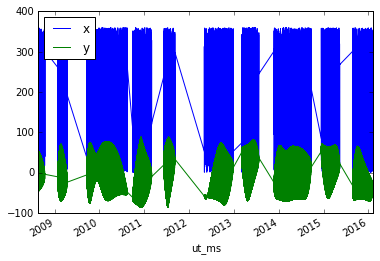

In [23]:
cl_nm_xy = {1:'x',2:'y'}
OMP_timeSe = tmp_class[ tmp_class[0]=='OMP'].drop(0,axis=1).rename(columns=cl_nm_xy).set_index('ut_ms')
print(OMP_timeSe.head())
OMP_timeSe=OMP_timeSe.convert_objects(convert_numeric=True)
OMP_timeSe.plot()

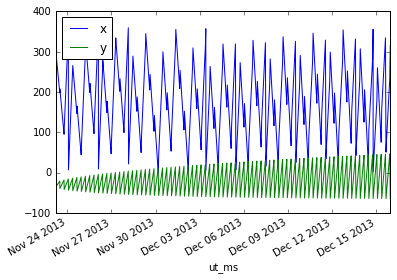

In [32]:
OMP_timeSe['2013-10-06':'2013-12-15'].plot()

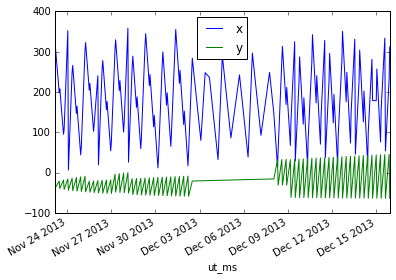

In [39]:
OMP_timeSe['2013-10-06':'2013-12-15'].resample('h').mean().dropna().plot()

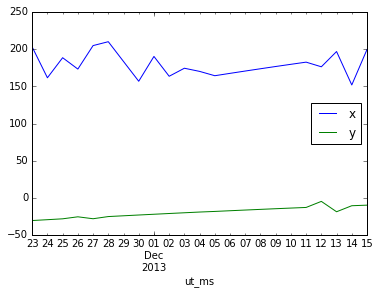

In [33]:
OMP_timeSe['2013-10-06':'2013-12-15'].resample('d').mean().plot()

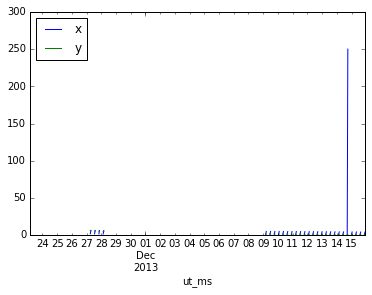

In [35]:
OMP_timeSe['2013-10-06':'2013-12-15'].resample('h').std().plot()

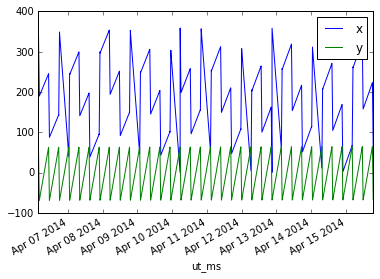

In [25]:
OMP_timeSe['2014-04-06':'2014-04-15'].plot()

                          x       y
ut_ms                              
2012-05-27 02:44:02  182.94  -68.68
2012-05-27 09:43:29  080.65  -68.86
2012-05-27 16:42:53  338.37  -69.02
2012-05-27 23:42:18  236.06  -69.20
2012-05-28 06:41:48  133.72  -69.35


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


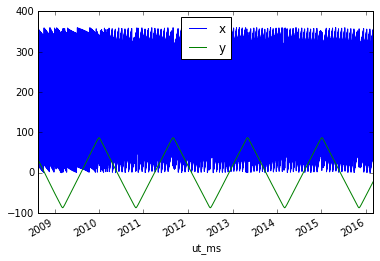

In [99]:
SSP_timeSe = tmp_class[ tmp_class[0]=='SSP'].drop(0,axis=1).rename(columns=cl_nm_xy).set_index('ut_ms')
SSP_timeSe.head()
print(SSP_timeSe.head())
SSP_timeSe=SSP_timeSe.convert_objects(convert_numeric=True)
SSP_timeSe.plot()

,x,y
ut_ms,,
2014-04-06 04:07:45,20.09,-71.02
2014-04-06 11:07:01,277.78,-70.86
2014-04-06 18:06:13,175.52,-70.68
2014-04-07 01:05:25,73.28,-70.52
2014-04-07 08:04:39,331.04,-70.34


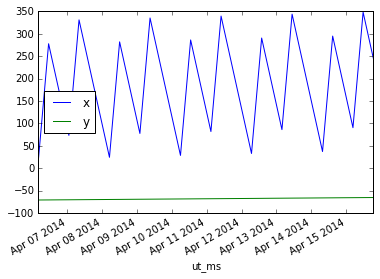

In [119]:
SSP_timeSe['2014-04-06':'2014-04-15'].plot()
SSP_timeSe['2014-04-06':'2014-04-15'].head()

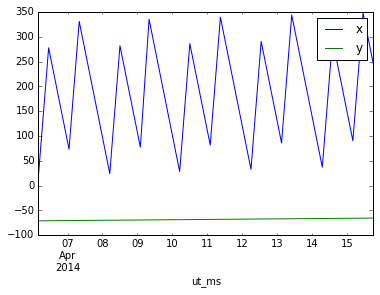

In [117]:
SSP_timeSe['2014-04-06':'2014-04-15'].resample('1H').mean().interpolate().plot()

residual commands that appear one time only:

In [127]:
new_count_values = df_new_evtf[ ~ContInfs ]['description'].value_counts()
new_count_values[new_count_values==1].head(50)

_DE_013.66_                  1
PERICENTRE_PASSAGE_07697_    1
PERICENTRE_PASSAGE_12581_    1
APOCENTRE_PASSAGE_14493      1
PERICENTRE_PASSAGE_15003_    1
PERICENTRE_PASSAGE_13110_    1
APOCENTRE_PASSAGE_12520      1
APOCENTRE_PASSAGE_08101      1
PERICENTRE_PASSAGE_06403_    1
PERICENTRE_PASSAGE_08759_    1
PERICENTRE_PASSAGE_10989_    1
PERICENTRE_PASSAGE_08295_    1
_RA_273.09_                  1
APOCENTRE_PASSAGE_09826      1
APOCENTRE_PASSAGE_14449      1
APOCENTRE_PASSAGE_08982      1
APOCENTRE_PASSAGE_13287      1
_RA_049.99_                  1
_RA_218.28_                  1
APOCENTRE_PASSAGE_10256      1
PERICENTRE_PASSAGE_13973_    1
PERICENTRE_PASSAGE_11767_    1
_RA_269.95_                  1
_RA_115.27_                  1
APOCENTRE_PASSAGE_06984      1
PERICENTRE_PASSAGE_12883_    1
PERICENTRE_PASSAGE_06302_    1
PERICENTRE_PASSAGE_11331_    1
APOCENTRE_PASSAGE_12844      1
PERICENTRE_PASSAGE_06989_    1
APOCENTRE_PASSAGE_11842      1
PERICENTRE_PASSAGE_13820_    1
APOCENTR

** TODO ** : There is the possibiltiy to extract _RA_ and the numbers of apocentre and pericentre

## Eclipses

In [20]:
new_count_values 

NameError: name 'new_count_values' is not defined

In [21]:
startend_evtf = df_new_evtf['description'].str.contains('_END') | df_new_evtf['description'].str.contains('START')
df_new_evtf[startend_evtf].description.value_counts() 

_RANGE_06000KM_END       13018
_RANGE_06000KM_START     13017
OCC_MARS_200KM_END_       5892
OCC_MARS_200KM_START_     5892
OCC_MARS_START_           5221
OCC_MARS_END_             5221
MAR_PENUMBRA_START        5025
MAR_PENUMBRA_END          5025
MAR_UMBRA_END             4982
MAR_UMBRA_START           4982
PHO_PENUMBRA_START          35
PHO_PENUMBRA_END            35
DEI_PENUMBRA_START          25
DEI_PENUMBRA_END            25
OCC_PHOBOS_START            23
OCC_PHOBOS_END              23
OCC_DEIMOS_START            18
OCC_DEIMOS_END              18
PHO_UMBRA_END               10
PHO_UMBRA_START             10
CEB_CON_END_SSCE_5           4
CAN_CON_START_SESC_3         4
MLG_OCC_MOON_TC_END          4
KOU_CON_START_SESC_3         4
CEB_CON_END_SESC_3           4
CAN_CON_END_SSCE_5           4
GDS_CON_END_SSCE_5           4
KOU_CON_START_SSCE_5         4
MAD_CON_START_SSCE_5         4
MLG_OCC_MOON_TC_START        4
                         ...  
GDS_OPP_END_SSCE_5           3
BLK_OCC_

In [22]:
df_new_evtf[df_new_evtf['description'].str.contains( "BLK_OCC_MOON")]

,description,ut_ms
231505,BLK_OCC_MOON_TM_START,2009-09-13 15:51:48
231507,BLK_OCC_MOON_TC_START,2009-09-13 15:52:33
231510,BLK_OCC_MOON_TM_END,2009-09-13 16:31:21
231512,BLK_OCC_MOON_TC_END,2009-09-13 16:32:14
332834,BLK_OCC_MOON_TM_START,2010-12-06 21:29:54
332836,BLK_OCC_MOON_TC_START,2010-12-06 21:31:47
332841,BLK_OCC_MOON_TM_END,2010-12-06 22:16:42
332843,BLK_OCC_MOON_TC_END,2010-12-06 22:18:31
82174,BLK_OCC_MOON_TM_START,2013-05-09 14:57:19
82176,BLK_OCC_MOON_TC_START,2013-05-09 15:00:27


In [23]:
df_new_evtf[df_new_evtf['description'].str.contains( "PENUMBRA")].description.value_counts()

MAR_PENUMBRA_START    5025
MAR_PENUMBRA_END      5025
PHO_PENUMBRA_END        35
PHO_PENUMBRA_START      35
DEI_PENUMBRA_END        25
DEI_PENUMBRA_START      25
Name: description, dtype: int64

In [24]:
df_new_evtf[df_new_evtf['description'].str.contains( "_UMBRA")].description.value_counts()

MAR_UMBRA_END      4982
MAR_UMBRA_START    4982
PHO_UMBRA_START      10
PHO_UMBRA_END        10
DEI_UMBRA_START       2
DEI_UMBRA_END         2
Name: description, dtype: int64

In [25]:
eclypse_events = df_new_evtf['description'].str.contains( "PENUMBRA") | df_new_evtf['description'].str.contains( "_UMBRA")

In [26]:
df_new_evtf[eclypse_events].description.value_counts()

MAR_PENUMBRA_END      5025
MAR_PENUMBRA_START    5025
MAR_UMBRA_END         4982
MAR_UMBRA_START       4982
PHO_PENUMBRA_END        35
PHO_PENUMBRA_START      35
DEI_PENUMBRA_END        25
DEI_PENUMBRA_START      25
PHO_UMBRA_START         10
PHO_UMBRA_END           10
DEI_UMBRA_START          2
DEI_UMBRA_END            2
Name: description, dtype: int64

In [27]:
sat_name = ["MAR", "PHO", "DEI"]
event_tpe = ["PENUMBRA","UMBRA"]
eveny_status = ["START","END"]


In [28]:
eclypses_evtf= df_new_evtf[eclypse_events]


In [29]:
eclypses_evtf.head()

,description,ut_ms
160114,MAR_PENUMBRA_START,2008-08-22 02:08:22
160115,MAR_UMBRA_START,2008-08-22 02:09:46
160116,MAR_UMBRA_END,2008-08-22 02:11:15
160118,MAR_PENUMBRA_END,2008-08-22 02:12:32
160182,MAR_PENUMBRA_START,2008-08-22 08:59:26


In [30]:
eclypses_evtf.shift(-1).head()

,description,ut_ms
160114,MAR_UMBRA_START,2008-08-22 02:09:46
160115,MAR_UMBRA_END,2008-08-22 02:11:15
160116,MAR_PENUMBRA_END,2008-08-22 02:12:32
160118,MAR_PENUMBRA_START,2008-08-22 08:59:26
160182,MAR_PENUMBRA_END,2008-08-22 09:03:11


Firstly! All the UMBRA start are preceeded by penumbra start?

In [31]:
(eclypses_evtf[(eclypses_evtf.description == "MAR_UMBRA_START").shift(-1).fillna(False)].description =="MAR_PENUMBRA_START").value_counts()

True    4982
Name: description, dtype: int64

Or if every umbra end follows an umbra start

In [32]:
(eclypses_evtf[(eclypses_evtf.description == "MAR_UMBRA_END").shift(-1).fillna(False)].description =="MAR_UMBRA_START").value_counts()

True     4980
False       2
Name: description, dtype: int64

This is not hte case!! 

In [33]:
proper_ends = (eclypses_evtf.description == "MAR_UMBRA_END").shift(-1).fillna(False)
eclypses_evtf[proper_ends][~(eclypses_evtf[proper_ends].description =="MAR_UMBRA_START")]

,description,ut_ms
203633,PHO_PENUMBRA_END,2009-03-31 15:49:31
333143,DEI_PENUMBRA_END,2010-12-08 03:53:01


There are two overlapping events, namely: during a PHO nad a DEI eclypses,  MarsExpress was behind Mars.

So probably, the easiest way to run this is to split each eclypses event into different features even thotght they contibute similarly. 

## Mars
Let's look fr the proper events, meaning Pen_st -> Umb_st -> Umb_en -> Pen_end

In [34]:
mars_evnt = eclypses_evtf[eclypses_evtf.description.str.contains('MAR_')]
mars_evnt.sort_values(by='ut_ms',inplace=True)
mars_evnt['proper_evn'] = False
mars_evnt.head()

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,description,ut_ms,proper_evn
160114,MAR_PENUMBRA_START,2008-08-22 02:08:22,False
160115,MAR_UMBRA_START,2008-08-22 02:09:46,False
160116,MAR_UMBRA_END,2008-08-22 02:11:15,False
160118,MAR_PENUMBRA_END,2008-08-22 02:12:32,False
160182,MAR_PENUMBRA_START,2008-08-22 08:59:26,False


In [35]:
  mars_evnt.proper_evn = mars_evnt.description.str.contains('_UMBRA_START').shift(-1).fillna(False)

/usr/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
 mars_evnt.head(20)

,description,ut_ms,proper_evn
160114,MAR_PENUMBRA_START,2008-08-22 02:08:22,True
160115,MAR_UMBRA_START,2008-08-22 02:09:46,False
160116,MAR_UMBRA_END,2008-08-22 02:11:15,False
160118,MAR_PENUMBRA_END,2008-08-22 02:12:32,False
160182,MAR_PENUMBRA_START,2008-08-22 08:59:26,False
160183,MAR_PENUMBRA_END,2008-08-22 09:03:11,False
160244,MAR_PENUMBRA_START,2008-08-22 15:50:28,False
160245,MAR_PENUMBRA_END,2008-08-22 15:53:37,False
160320,MAR_PENUMBRA_START,2008-08-22 22:41:22,False
160321,MAR_PENUMBRA_END,2008-08-22 22:44:10,False


Check if penumbra end is preceed by umbra end

In [37]:
mars_evnt.proper_evn_end = mars_evnt.description.str.contains('_UMBRA_END').shift(1).fillna(False)

I build a row-based event

In [38]:
complex_mars_evnt = mars_evnt.copy()

In [39]:
complex_mars_evnt['ut_ms_umbra_start']= mars_evnt['ut_ms'].shift(-1)
complex_mars_evnt['ut_ms_umbra_stop']= mars_evnt['ut_ms'].shift(-2)
complex_mars_evnt['ut_ms_penum_stop']= mars_evnt['ut_ms'].shift(-3)
complex_mars_evnt.head()

,description,ut_ms,proper_evn,ut_ms_umbra_start,ut_ms_umbra_stop,ut_ms_penum_stop
160114,MAR_PENUMBRA_START,2008-08-22 02:08:22,True,2008-08-22 02:09:46,2008-08-22 02:11:15,2008-08-22 02:12:32
160115,MAR_UMBRA_START,2008-08-22 02:09:46,False,2008-08-22 02:11:15,2008-08-22 02:12:32,2008-08-22 08:59:26
160116,MAR_UMBRA_END,2008-08-22 02:11:15,False,2008-08-22 02:12:32,2008-08-22 08:59:26,2008-08-22 09:03:11
160118,MAR_PENUMBRA_END,2008-08-22 02:12:32,False,2008-08-22 08:59:26,2008-08-22 09:03:11,2008-08-22 15:50:28
160182,MAR_PENUMBRA_START,2008-08-22 08:59:26,False,2008-08-22 09:03:11,2008-08-22 15:50:28,2008-08-22 15:53:37


In [40]:
mars_complete_events = complex_mars_evnt.ix[complex_mars_evnt.proper_evn,[1,3,4,5] ].rename(columns={"ut_ms":"ut_ms_penum_start"})
mars_complete_events .tail()

,ut_ms_penum_start,ut_ms_umbra_start,ut_ms_umbra_stop,ut_ms_penum_stop
594188,2016-02-28 18:49:30,2016-02-28 18:49:37,2016-02-28 19:08:50,2016-02-28 19:08:58
594248,2016-02-29 01:49:18,2016-02-29 01:49:25,2016-02-29 02:08:33,2016-02-29 02:08:41
594308,2016-02-29 08:49:12,2016-02-29 08:49:19,2016-02-29 09:08:22,2016-02-29 09:08:30
594356,2016-02-29 15:49:04,2016-02-29 15:49:11,2016-02-29 16:08:09,2016-02-29 16:08:17
594402,2016-02-29 22:48:59,2016-02-29 22:49:06,2016-02-29 23:08:00,2016-02-29 23:08:08


In [41]:
#mars_complete_events.to_pickle(dir_data + "mars_complete_events.p")
#mars_complete_events.to_csv(dir_data + "mars_complete_events.csv")

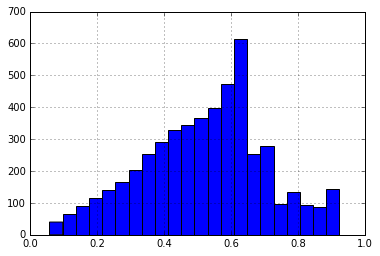

In [42]:
((mars_complete_events['ut_ms_penum_stop'] - mars_complete_events['ut_ms_penum_start'])/ np.timedelta64(1, 'h') ) .hist(bins=22)

Distribution of the duration of the whole eclypse cylcle

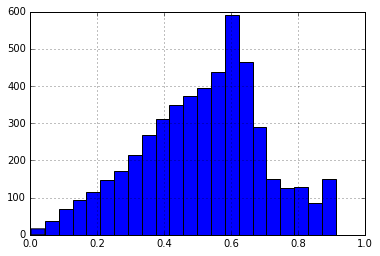

In [43]:
((mars_complete_events['ut_ms_umbra_stop'] - mars_complete_events['ut_ms_umbra_start'])/ np.timedelta64(1, 'h') ) .hist(bins=22)

So it seems that in these cases most of the time is sspnet on the eclypse

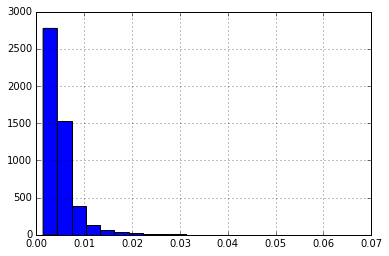

In [44]:
((mars_complete_events['ut_ms_umbra_start'] - mars_complete_events['ut_ms_penum_start'])/ np.timedelta64(1, 'h') ) .hist(bins=22)

In [45]:
mars_full_eclyps_evnt = mars_evnt[mars_evnt.proper_evn].ut_ms.to_frame()
mars_evnt[mars_evnt.proper_evn].head()

,description,ut_ms,proper_evn
160114,MAR_PENUMBRA_START,2008-08-22 02:08:22,True
190735,MAR_PENUMBRA_START,2009-02-06 19:18:51,True
190797,MAR_PENUMBRA_START,2009-02-07 02:11:09,True
190869,MAR_PENUMBRA_START,2009-02-07 09:03:43,True
190953,MAR_PENUMBRA_START,2009-02-07 15:56:26,True


In [46]:
mars_full_eclyps_evnt.rename(columns={'ut_ms':'ut_ms_start_pn'},inplace=True)

In [47]:
mars_full_eclyps_evnt['ut_ms_start_u'] = mars_evnt[mars_evnt.proper_evn.shift(1).fillna(False)].ut_ms

In [440]:
#mars_full_eclyps_evnt
ev_times = 
pd.concat([s.dropna().reset_index(drop=True) for col, s in df.set_index('ev_type', append=True).unstack()['ev_time'].items()], axis=1)

NameError: name 'df' is not defined

### Make the feature

In [48]:
timeline_mars_eclypse = pd.read_pickle(dir_data + "timeline.p")

In [49]:
type(timeline_mars_eclypse.head())

pandas.core.frame.DataFrame

mar

In [50]:
mars_complete_events.head()

,ut_ms_penum_start,ut_ms_umbra_start,ut_ms_umbra_stop,ut_ms_penum_stop
160114,2008-08-22 02:08:22,2008-08-22 02:09:46,2008-08-22 02:11:15,2008-08-22 02:12:32
190735,2009-02-06 19:18:51,2009-02-06 19:22:52,2009-02-06 19:26:21,2009-02-06 19:30:04
190797,2009-02-07 02:11:09,2009-02-07 02:13:45,2009-02-07 02:22:47,2009-02-07 02:25:06
190869,2009-02-07 09:03:43,2009-02-07 09:05:53,2009-02-07 09:17:48,2009-02-07 09:19:41
190953,2009-02-07 15:56:26,2009-02-07 15:58:20,2009-02-07 16:12:39,2009-02-07 16:14:16


In [51]:
mars_complete_events.loc[16,"ut_ms_umbra_start"]

Timestamp('2012-05-27 02:06:22')

In [52]:
timeline_mars_eclypse[mars_complete_events.loc[16,"ut_ms_umbra_start"]:mars_complete_events.loc[16,"ut_ms_umbra_stop"]]

""
ut_ms
2012-05-27 02:06:33.757
2012-05-27 02:07:05.763
2012-05-27 02:07:37.754
2012-05-27 02:08:09.763
2012-05-27 02:08:41.755
2012-05-27 02:09:13.759
2012-05-27 02:09:45.755
2012-05-27 02:10:17.759
2012-05-27 02:10:49.754


In [446]:
#timeline_mars_eclypse[mars_complete_events.loc[16,"ut_ms_penum_start"]]

In [53]:
mars_complete_events["start_next_penum"] = mars_complete_events['ut_ms_penum_start'].shift(-1)

In [54]:
mars_complete_events.sort_values("ut_ms_penum_start").head()

,ut_ms_penum_start,ut_ms_umbra_start,ut_ms_umbra_stop,ut_ms_penum_stop,start_next_penum
160114,2008-08-22 02:08:22,2008-08-22 02:09:46,2008-08-22 02:11:15,2008-08-22 02:12:32,2009-02-06 19:18:51
190735,2009-02-06 19:18:51,2009-02-06 19:22:52,2009-02-06 19:26:21,2009-02-06 19:30:04,2009-02-07 02:11:09
190797,2009-02-07 02:11:09,2009-02-07 02:13:45,2009-02-07 02:22:47,2009-02-07 02:25:06,2009-02-07 09:03:43
190869,2009-02-07 09:03:43,2009-02-07 09:05:53,2009-02-07 09:17:48,2009-02-07 09:19:41,2009-02-07 15:56:26
190953,2009-02-07 15:56:26,2009-02-07 15:58:20,2009-02-07 16:12:39,2009-02-07 16:14:16,2009-02-07 22:49:17


In [55]:
timeline_mars_eclypse["eclypse_sts"] = np.NaN
timeline_mars_eclypse.head()

,eclypse_sts
ut_ms,
2008-08-22 00:00:09.542,NaN
2008-08-22 00:00:41.537,NaN
2008-08-22 00:01:13.542,NaN
2008-08-22 00:01:45.537,NaN
2008-08-22 00:02:17.542,NaN


In [56]:
timeline_mars_eclypse.loc["2008-08-22 00:00:41":"2008-08-22 00:02:17","eclypse_sts"]

ut_ms
2008-08-22 00:00:41.537   NaN
2008-08-22 00:01:13.542   NaN
2008-08-22 00:01:45.537   NaN
2008-08-22 00:02:17.542   NaN
Name: eclypse_sts, dtype: float64

In [104]:
timeline_mars_eclypse.loc["2008-08-22 00:00:09":mars_complete_events.iloc[0].ut_ms_penum_stop,"eclypse_sts"] = 1.0

In [105]:
for idx,row in mars_complete_events.iterrows():
    #print(row)
    #print(row.loc["ut_ms_umbra_start"],row.loc["ut_ms_umbra_stop"])
    timeline_mars_eclypse.loc[row["ut_ms_umbra_start"]:row["ut_ms_umbra_stop"],"eclypse_sts"] = 0.0
    timeline_mars_eclypse.loc[row["ut_ms_penum_stop"]:row["start_next_penum"],"eclypse_sts"] = 1.0

#timeline_mars_eclypse.iloc[0,0]  = 1.0

In [106]:
timeline_filled = timeline_mars_eclypse.interpolate(method='time')

In [107]:
timeline_filled.head()

,eclypse_sts
ut_ms,
2008-08-22 00:00:09.542,1.0
2008-08-22 00:00:41.537,1.0
2008-08-22 00:01:13.542,1.0
2008-08-22 00:01:45.537,1.0
2008-08-22 00:02:17.542,1.0


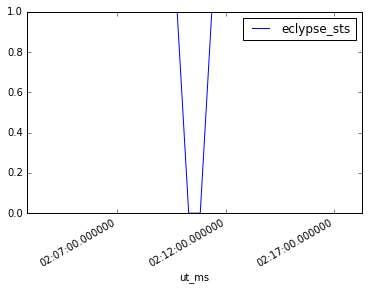

In [108]:

timeline_mars_eclypse.iloc[230:260].interpolate(method='time').plot()

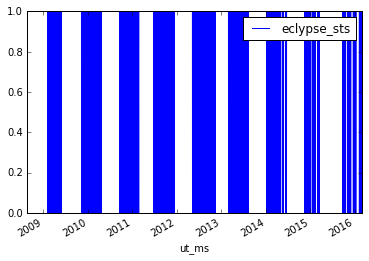

In [109]:
timeline_filled.plot()

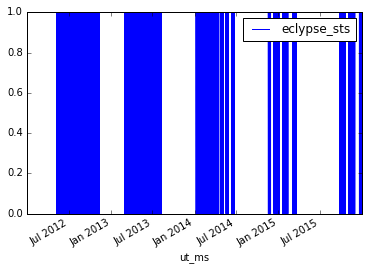

In [110]:
timeline_filled["2012":"2015"].plot()

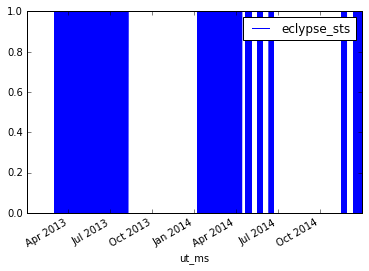

In [111]:
timeline_filled["2013":"2014"].plot()

This strange gap has to be verified, I'll give a look at the original file:

In [112]:
mars_umbra_evnts = df_new_evtf.loc[ df_new_evtf.description.str.contains("MAR_UMBRA_START")]
mars_umbra_evnts.head()

,description,ut_ms
160115,MAR_UMBRA_START,2008-08-22 02:09:46
190736,MAR_UMBRA_START,2009-02-06 19:22:52
190798,MAR_UMBRA_START,2009-02-07 02:13:45
190870,MAR_UMBRA_START,2009-02-07 09:05:53
190954,MAR_UMBRA_START,2009-02-07 15:58:20


In [113]:
mars_umbra_evnts.set_index('ut_ms',inplace=True)
mars_umbra_evnts.loc[:,'cout_mars-umbra'] = 1
mars_umbra_evnts.head()
events_per_day = mars_umbra_evnts.resample("d").sum().fillna(0)

/usr/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


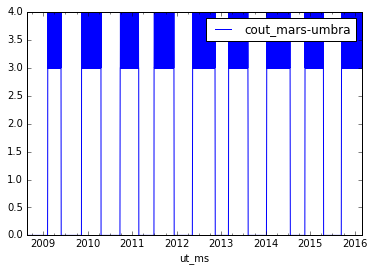

In [114]:
events_per_day.plot()


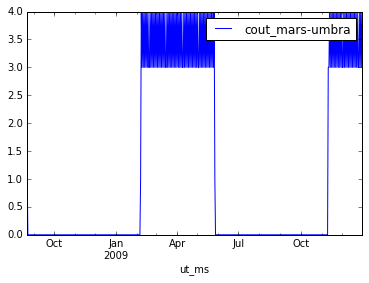

In [118]:
events_per_day["2000":"2009"].plot()

## Eclypses - non-complete

In [71]:
mars_evnt.head(10)

,description,ut_ms,proper_evn
160114,MAR_PENUMBRA_START,2008-08-22 02:08:22,True
160115,MAR_UMBRA_START,2008-08-22 02:09:46,False
160116,MAR_UMBRA_END,2008-08-22 02:11:15,False
160118,MAR_PENUMBRA_END,2008-08-22 02:12:32,False
160182,MAR_PENUMBRA_START,2008-08-22 08:59:26,False
160183,MAR_PENUMBRA_END,2008-08-22 09:03:11,False
160244,MAR_PENUMBRA_START,2008-08-22 15:50:28,False
160245,MAR_PENUMBRA_END,2008-08-22 15:53:37,False
160320,MAR_PENUMBRA_START,2008-08-22 22:41:22,False
160321,MAR_PENUMBRA_END,2008-08-22 22:44:10,False


In [81]:
mars_evnt.loc[:,'ut_ms_end'] = mars_evnt.loc[:,'ut_ms'].shift(-1)
mars_evnt.loc[:,'test_desc'] = mars_evnt.loc[:,'description'].shift(-1)

/usr/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [82]:
mars_evnt.head()

,description,ut_ms,proper_evn,ut_ms_end,test_desc
160114,MAR_PENUMBRA_START,2008-08-22 02:08:22,True,2008-08-22 02:09:46,MAR_UMBRA_START
160115,MAR_UMBRA_START,2008-08-22 02:09:46,False,2008-08-22 02:11:15,MAR_UMBRA_END
160116,MAR_UMBRA_END,2008-08-22 02:11:15,False,2008-08-22 02:12:32,MAR_PENUMBRA_END
160118,MAR_PENUMBRA_END,2008-08-22 02:12:32,False,2008-08-22 08:59:26,MAR_PENUMBRA_START
160182,MAR_PENUMBRA_START,2008-08-22 08:59:26,False,2008-08-22 09:03:11,MAR_PENUMBRA_END


In [93]:
mars_incomplete_events = mars_evnt.loc[(mars_evnt.description == "MAR_PENUMBRA_START") & ~mars_evnt.proper_evn,["ut_ms","ut_ms_end"]].rename(columns={"ut_ms":"ut_ms_start"})
mars_incomplete_events.head()

,ut_ms_start,ut_ms_end
160182,2008-08-22 08:59:26,2008-08-22 09:03:11
160244,2008-08-22 15:50:28,2008-08-22 15:53:37
160320,2008-08-22 22:41:22,2008-08-22 22:44:10
160382,2008-08-23 05:32:37,2008-08-23 05:34:24
160456,2008-08-23 12:24:00,2008-08-23 12:24:30


For these partial eclypses a first approximation can be a function that smoothly reach a maximu at the half of the event and then it dcreasies a pssibility can be $$ - \frac{ (t-t_{0})^2 } {\sigma ^2 } + Max $$ where $$ t_0 = \frac{t_S + t_E}{2}$$ and  $$\sigma = \frac{t_E-t_S}{2 \sqrt{Max}}$$

In [95]:
mars_incomplete_events.shape

(43, 2)

(7, 4)


/usr/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


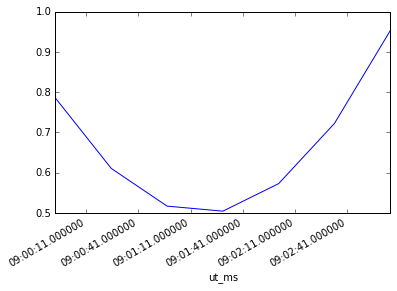

(6, 4)


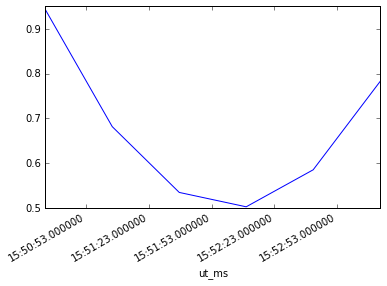

(5, 4)


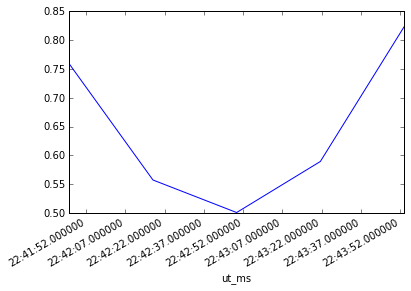

(3, 4)


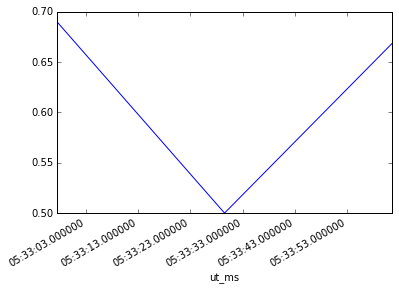

(1, 4)


/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=733277.516777, right=733277.516777
  'left=%s, right=%s') % (left, right))


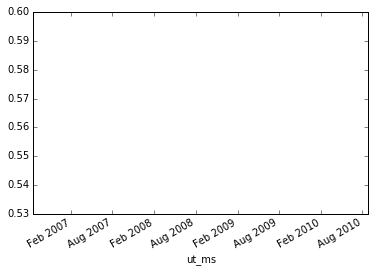

(14, 4)


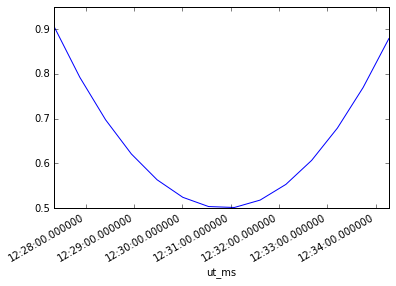

(8, 4)


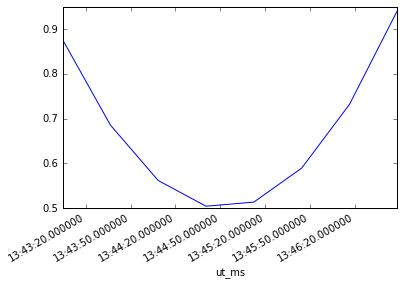

(6, 4)


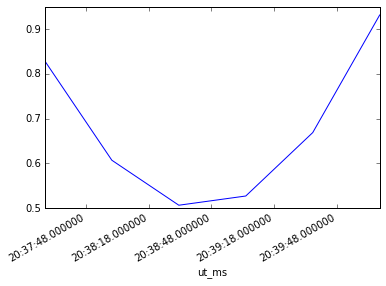

(2, 4)


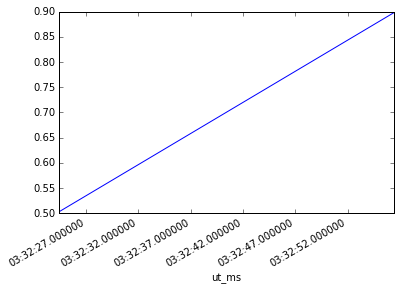

(11, 4)


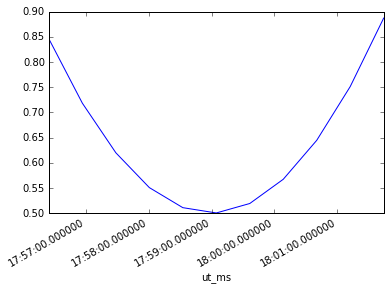

(19, 4)


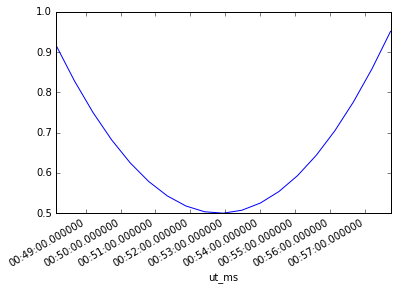

(7, 4)


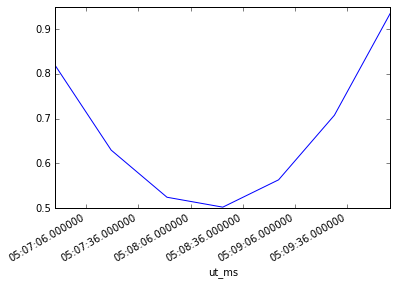

(6, 4)


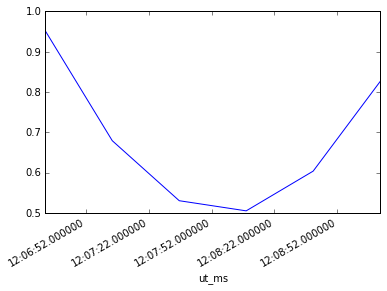

(4, 4)


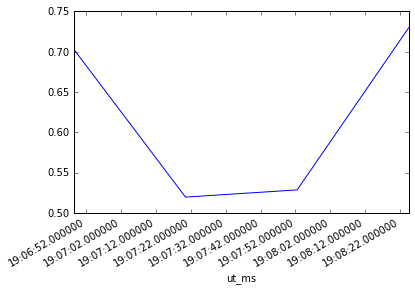

(3, 4)


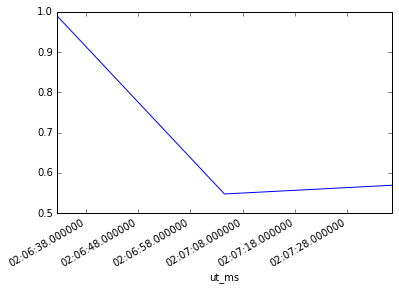

(8, 4)


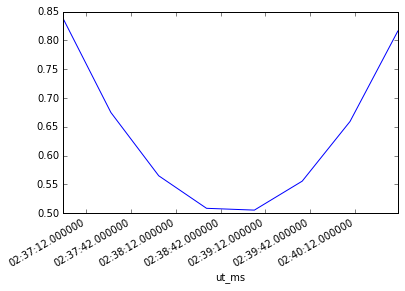

(12, 4)


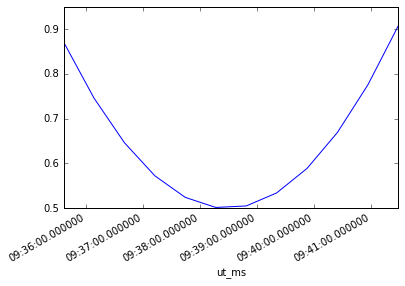

(7, 4)


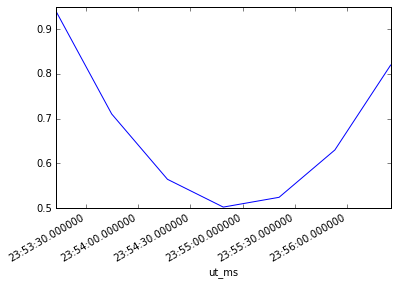

(5, 4)


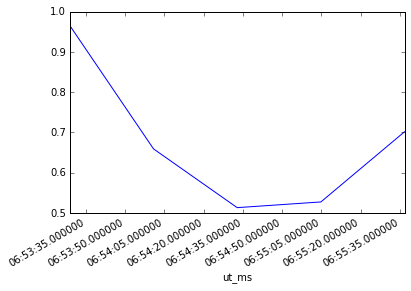

(2, 4)


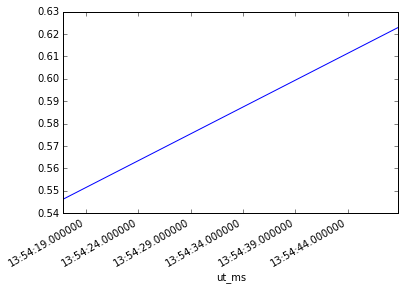

(7, 4)


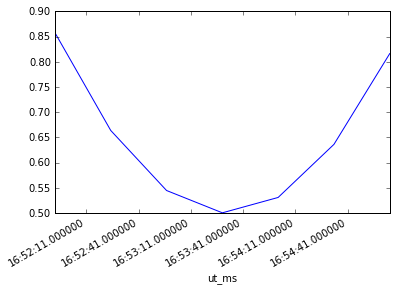

(13, 4)


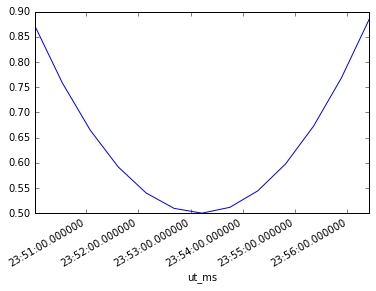

(6, 4)


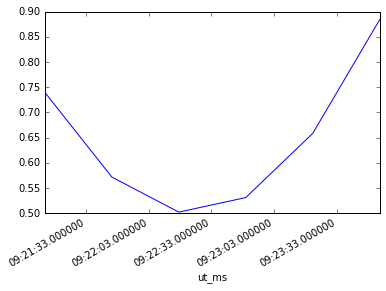

(6, 4)


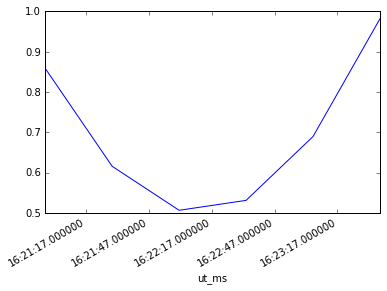

(4, 4)


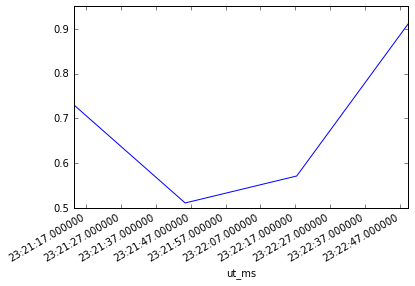

(3, 4)


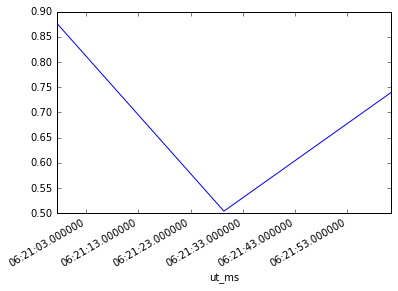

(2, 4)


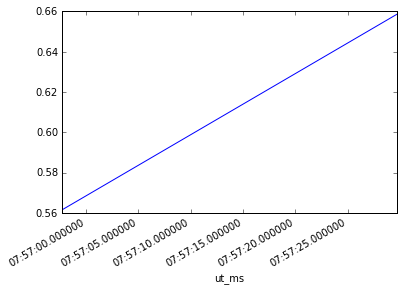

(8, 4)


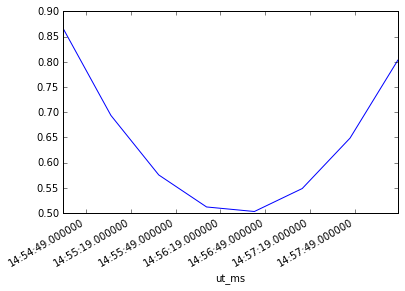

(5, 4)


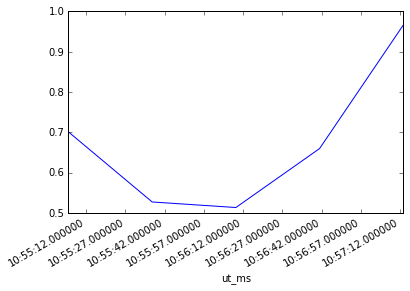

(3, 4)


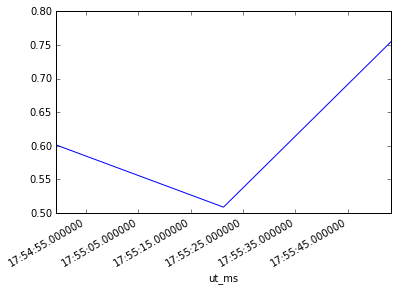

(10, 4)


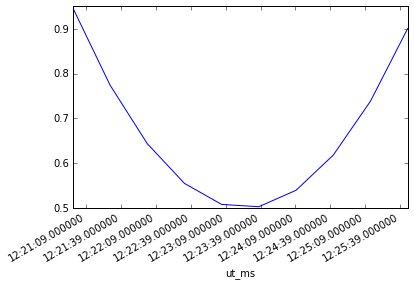

(5, 4)


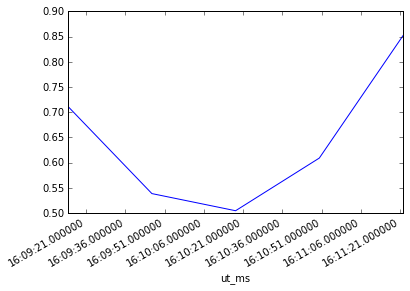

(5, 4)


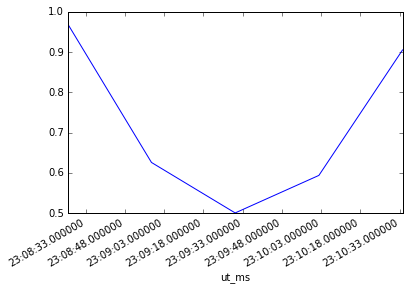

(2, 4)


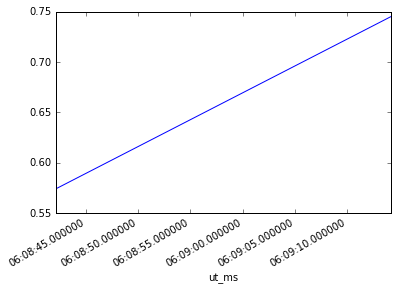

(8, 4)


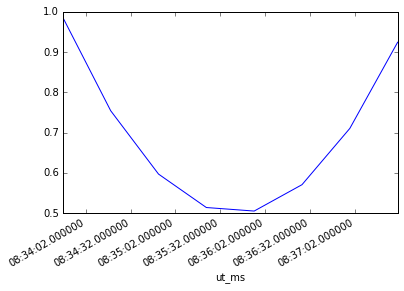

(11, 4)


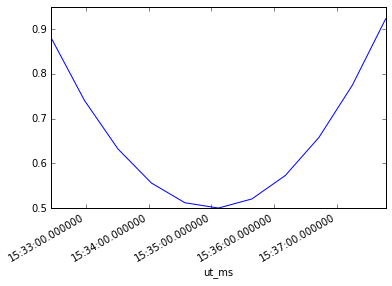

(1, 4)


/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735434.291667, right=735434.291667
  'left=%s, right=%s') % (left, right))


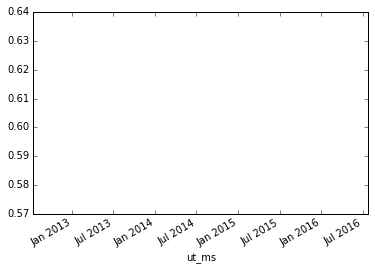

(1, 4)


/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735434.583333, right=735434.583333
  'left=%s, right=%s') % (left, right))


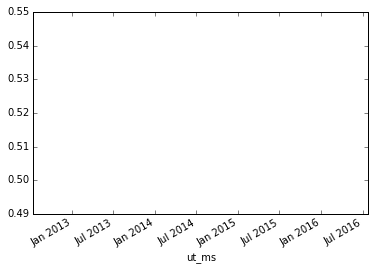

(1, 4)


/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735707.833333, right=735707.833333
  'left=%s, right=%s') % (left, right))


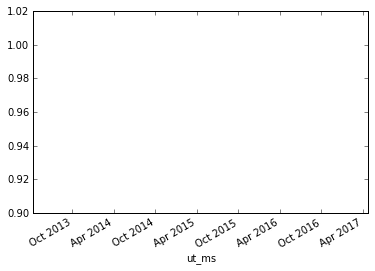

(1, 4)


/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735708.125, right=735708.125
  'left=%s, right=%s') % (left, right))


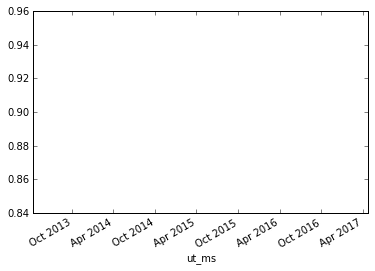

In [193]:
def luminosity(row,start,stop):
    Max = 0.5
    #print(type(row))
    #print(row.name)
    #print(type(row.name))
    t = row.name.timestamp()
    
    tstart = start.timestamp()
    tstop = stop.timestamp()
    t0 = (tstart + tstop ) / 2.0
    sigma = (tstop - tstart) / (2.0 * np.sqrt(Max))
    
    result_fun =1.0 - (- ((t-t0)/sigma)**2 + Max)

    #print(result_fun)
    return result_fun 
timeline_filled['eclypse_partial'] = 1.0
tmp_test_tt = []
for ix,row in mars_incomplete_events.iterrows():
    #timeline_filled.ix[row.ut_ms_start:row.ut_ms_end,'funzione'] 
    #print(row)
    if not timeline_filled.loc[row.ut_ms_start:row.ut_ms_end].empty:
        test = timeline_filled.loc[row.ut_ms_start:row.ut_ms_end].apply(lambda x: luminosity(x,row.ut_ms_start,row.ut_ms_end),axis=1)
        #tmp_test_tt.append([row,test])
        timeline_filled.loc[row.ut_ms_start:row.ut_ms_end].eclypse_partial = test
        try: 
            print(timeline_filled.loc[row.ut_ms_start:row.ut_ms_end].shape)
            timeline_filled.loc[row.ut_ms_start:row.ut_ms_end].eclypse_partial.plot()
            plt.show()
        except:
            print("ERRORE")
            print(test)
            print(timeline_filled.loc[row.ut_ms_start:row.ut_ms_end])
    
    

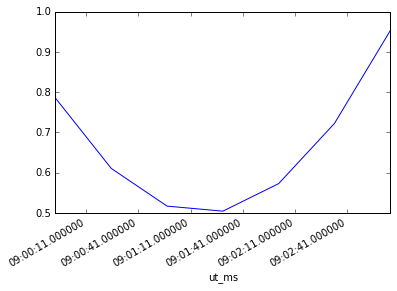

In [187]:
timeline_filled.loc["2008-08-22 08:59:26":"2008-08-22 09:03:11",'eclypse_partial'].plot()

In [204]:
timeline_filled.head()

,eclypse_sts,eclypse_partial,funzione,test
ut_ms,,,,
2008-08-22 00:00:09.542,1.0,1.0,NaN,1
2008-08-22 00:00:41.537,1.0,1.0,NaN,1
2008-08-22 00:01:13.542,1.0,1.0,NaN,1
2008-08-22 00:01:45.537,1.0,1.0,NaN,1
2008-08-22 00:02:17.542,1.0,1.0,NaN,1


In [206]:
timeline_total_eclypse = timeline_filled.eclypse_sts * timeline_filled.eclypse_partial
timeline_total_eclypse.head()

ut_ms
2008-08-22 00:00:09.542    1.0
2008-08-22 00:00:41.537    1.0
2008-08-22 00:01:13.542    1.0
2008-08-22 00:01:45.537    1.0
2008-08-22 00:02:17.542    1.0
dtype: float64

In [212]:
#timeline_total_eclypse.plot()

In [211]:
timeline_total_eclypse.to_pickle(dir_data + "eclypse_fine.p")
timeline_total_eclypse.to_csv(dir_data + "eclypse_fine.csv")

## Check Timeline frequency

In [194]:
timeline_filled['test']=1

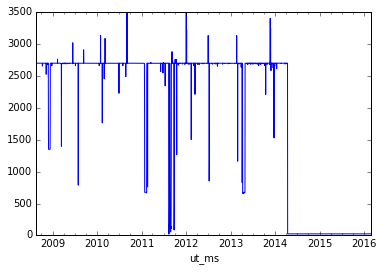

In [197]:
samples_per_day = timeline_filled.test.resample('d').sum()
samples_per_day.plot()

In [200]:
samples_per_day["2000":"2014"].describe()

count    2323.000000
mean     2328.234610
std       900.917273
min        20.000000
25%      2699.000000
50%      2699.000000
75%      2700.000000
max      3487.000000
Name: test, dtype: float64

In [203]:
samples_per_day["2015":"2018"].describe()

count    425.0
mean      24.0
std        0.0
min       24.0
25%       24.0
50%       24.0
75%       24.0
max       24.0
Name: test, dtype: float64

In [202]:
60*60*24 /2699.0

32.01185624305298

In [ ]:
60*60*24 /24 

it is possible to see that there are about 2699 samples per day uin the training set, while only 24 on the test set. The information on the sample can be interesting to see when the system is not properly working. 

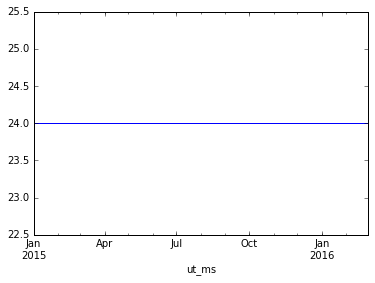

In [196]:
timeline_filled["2015":"2016"].test.resample('d').sum().plot()

In [214]:
samples_per_day.head()
samples_per_day.to_csv(dir_data + "pow_samples_per_day.csv")
samples_per_day.to_pickle(dir_data + "pow_samples_per_day.p")